In [47]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [48]:
df=pd.read_csv(r"C:\Users\Srivalli\OneDrive\Desktop\sem 5\ml\lab3 eval\Fish.csv")

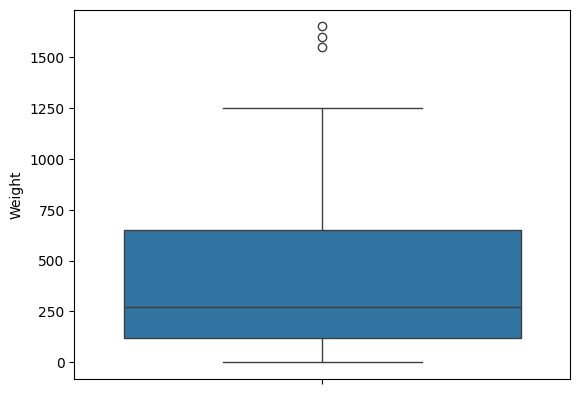

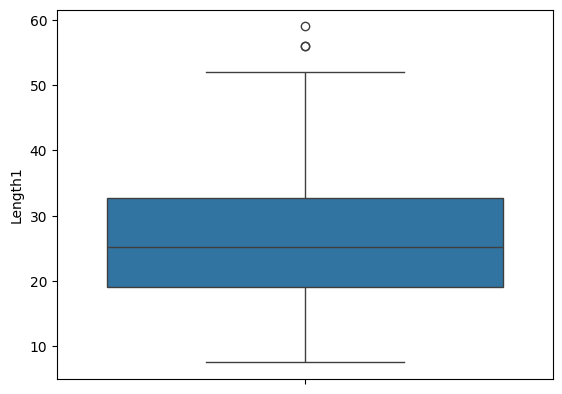

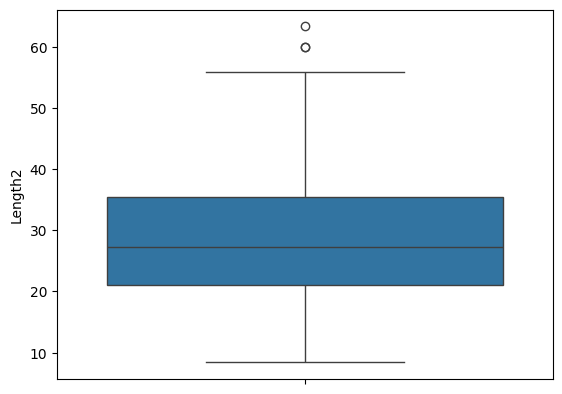

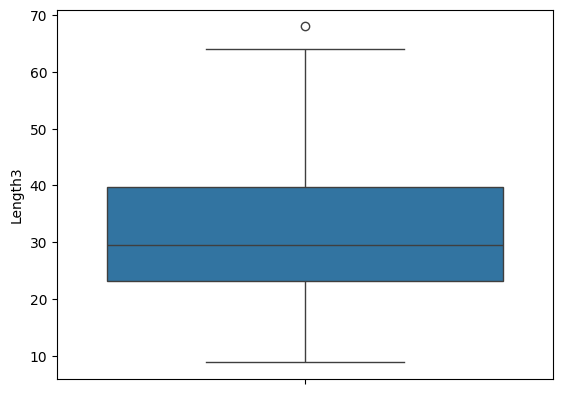

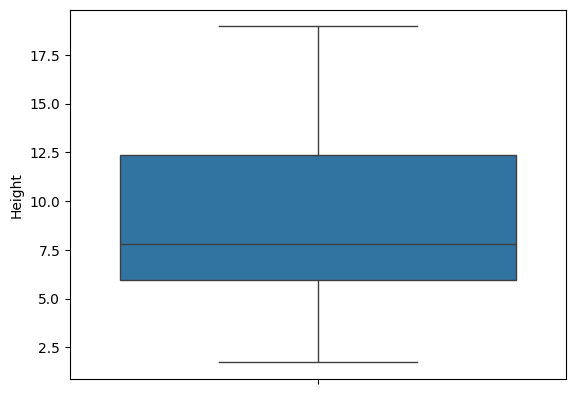

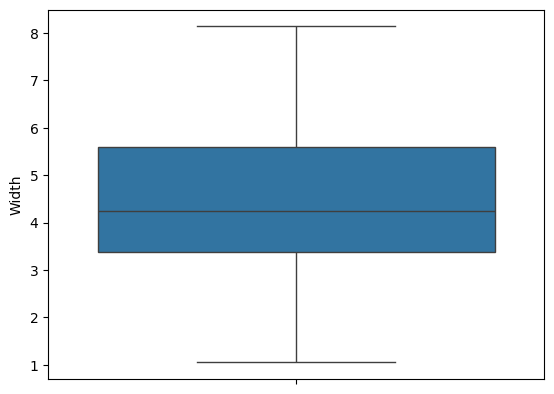

In [49]:
for i in df.select_dtypes(include='number').columns:
    sns.boxplot(df[i])
    plt.show()
    

In [50]:
for col in df.select_dtypes(include='number'):
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    iqr=q3-q1
    lower=q1-1.5*iqr
    upper=q3+1.5*iqr
    df=df[(df[col]>=lower) & (df[col]<=upper)]

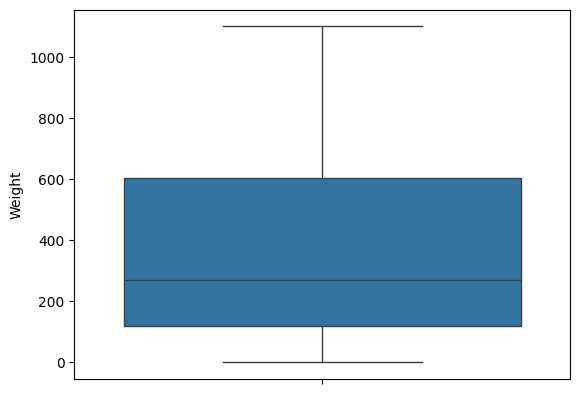

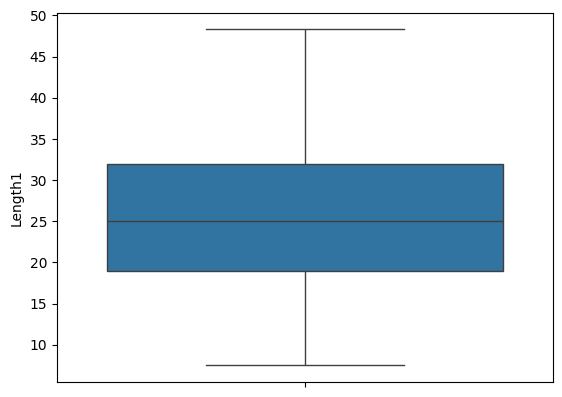

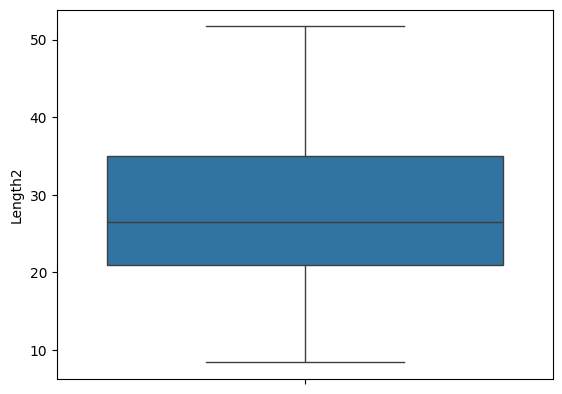

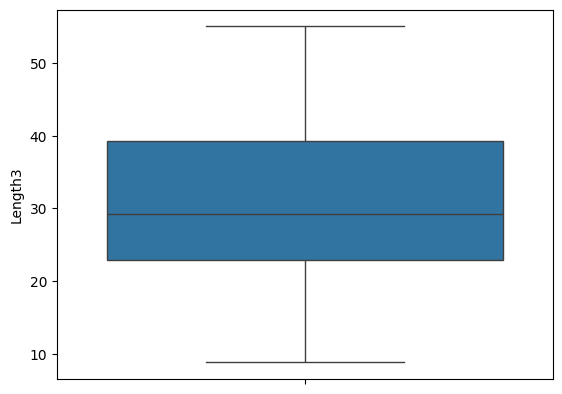

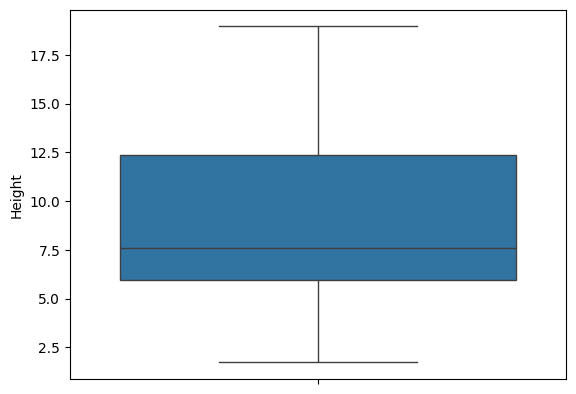

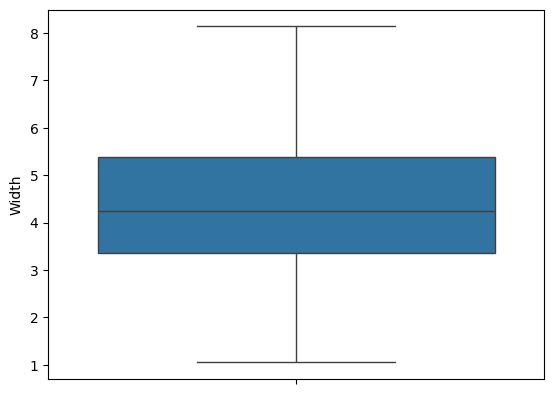

In [51]:
for i in df.select_dtypes(include='number').columns:
    sns.boxplot(df[i])
    plt.show()

In [52]:
df.isna().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [53]:
df.duplicated().sum()

np.int64(0)

In [54]:
df2=df.pop('Species')
df['Species']=df2
df.sample(10)

,Weight,Length1,Length2,Length3,Height,Width,Species
154,12.2,11.5,12.2,13.4,2.0904,1.3936,Smelt
121,1015.0,37.0,40.0,42.4,12.3808,7.4624,Perch
42,120.0,19.4,21.0,23.7,6.1146,3.2943,Roach
2,340.0,23.9,26.5,31.1,12.3778,4.6961,Bream
133,345.0,36.0,38.5,41.0,6.3960,3.9770,Pike
87,120.0,20.0,22.0,23.5,5.6400,3.5250,Perch
53,272.0,25.0,27.0,30.6,8.5680,4.7736,Roach
107,300.0,26.9,28.7,30.1,7.5852,4.6354,Perch
56,270.0,24.1,26.5,29.3,8.1454,4.2485,Whitefish
16,700.0,30.4,33.0,38.3,14.8604,5.2854,Bream


In [69]:
from sklearn import preprocessing

label=preprocessing.LabelEncoder()

df['Species']=label.fit_transform(df['Species'])



In [70]:
X=df.drop('Species',axis=1)
y=df['Species']

In [71]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest=train_test_split(X,y,train_size=0.7,random_state=42)

In [72]:
from sklearn.svm import SVC
model=SVC()

In [73]:
model.fit(xtrain,ytrain)

SVC()

In [74]:
model.score(xtest,ytest)

0.5319148936170213

In [75]:
model_c=SVC(C=1)
model_c.fit(xtrain,ytrain)
model_c.score(xtest,ytest)

0.5319148936170213

In [76]:
model_g=SVC(gamma=10)
model_g.fit(xtrain,ytrain)
model_g.score(xtest,ytest)

0.40425531914893614

In [77]:
model_kernel_linear=SVC(kernel='linear')
model_kernel_linear.fit(xtrain,ytrain)
model_kernel_linear.score(xtest,ytest)

0.9574468085106383

In [78]:
y

0      0
1      0
2      0
3      0
4      0
      ..
154    5
155    5
156    5
157    5
158    5
Name: Species, Length: 155, dtype: int64

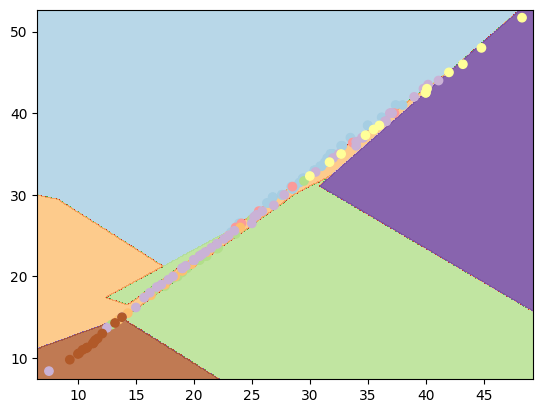

In [80]:
from matplotlib.colors import ListedColormap

X=df[['Length1','Length2']].values
y=df['Species'].factorize()[0]

C=1
svc=SVC(kernel='linear',C=1).fit(X,y)

xmin,xmax=X[:,0].min()-1,X[:,0].max()+1
ymin,ymax=X[:,1].min()-1,X[:,1].max()+1
h=(xmax/xmin)/100
xx,yy=np.meshgrid(np.arange(xmin,xmax,h),np.arange(ymin,ymax,h))

plt.subplot(1,1,1)
Z=svc.predict(np.c_[xx.ravel(),yy.ravel()])
Z=Z.reshape(xx.shape)
plt.contourf(xx,yy,Z,cmap=plt.cm.Paired,alpha=0.8)

plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.Paired)
plt.xlim(xx.min(),xx.max())
plt.show()

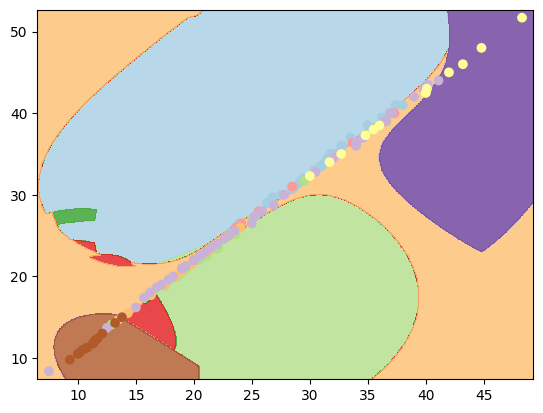

In [31]:
from matplotlib.colors import ListedColormap

X=df[['Length1','Length2']].values
y=df['Species'].factorize()[0]

C=1
svc=SVC(kernel='rbf',C=100,gamma=0.01).fit(X,y)

xmin,xmax=X[:,0].min()-1,X[:,0].max()+1
ymin,ymax=X[:,1].min()-1,X[:,1].max()+1
h=(xmax/xmin)/100
xx,yy=np.meshgrid(np.arange(xmin,xmax,h),np.arange(ymin,ymax,h))

plt.subplot(1,1,1)
Z=svc.predict(np.c_[xx.ravel(),yy.ravel()])
Z=Z.reshape(xx.shape)
plt.contourf(xx,yy,Z,cmap=plt.cm.Paired,alpha=0.8)

plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.Paired)
plt.xlim(xx.min(),xx.max())
plt.show()

In [33]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C':(1, 10, 100, 1000), 'gamma':(0.1, 0.01, 0.001, 0.0001)}

grid_search = GridSearchCV(svc, param_grid, cv=10, verbose=10)

grid_search.fit(xtrain,ytrain)

Fitting 10 folds for each of 16 candidates, totalling 160 fits
[CV 1/10; 1/16] START C=1, gamma=0.1............................................
[CV 1/10; 1/16] END .............C=1, gamma=0.1;, score=0.545 total time=   0.0s
[CV 2/10; 1/16] START C=1, gamma=0.1............................................
[CV 2/10; 1/16] END .............C=1, gamma=0.1;, score=0.545 total time=   0.0s
[CV 3/10; 1/16] START C=1, gamma=0.1............................................
[CV 3/10; 1/16] END .............C=1, gamma=0.1;, score=0.455 total time=   0.0s
[CV 4/10; 1/16] START C=1, gamma=0.1............................................
[CV 4/10; 1/16] END .............C=1, gamma=0.1;, score=0.455 total time=   0.0s
[CV 5/10; 1/16] START C=1, gamma=0.1............................................
[CV 5/10; 1/16] END .............C=1, gamma=0.1;, score=0.455 total time=   0.0s
[CV 6/10; 1/16] START C=1, gamma=0.1............................................
[CV 6/10; 1/16] END .............C=1, gamma=0.

C:\Users\Srivalli\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(


[CV 6/10; 3/16] END ...........C=1, gamma=0.001;, score=0.545 total time=   0.0s
[CV 7/10; 3/16] START C=1, gamma=0.001..........................................
[CV 7/10; 3/16] END ...........C=1, gamma=0.001;, score=0.545 total time=   0.0s
[CV 8/10; 3/16] START C=1, gamma=0.001..........................................
[CV 8/10; 3/16] END ...........C=1, gamma=0.001;, score=0.455 total time=   0.0s
[CV 9/10; 3/16] START C=1, gamma=0.001..........................................
[CV 9/10; 3/16] END ...........C=1, gamma=0.001;, score=0.600 total time=   0.0s
[CV 10/10; 3/16] START C=1, gamma=0.001.........................................
[CV 10/10; 3/16] END ..........C=1, gamma=0.001;, score=0.400 total time=   0.0s
[CV 1/10; 4/16] START C=1, gamma=0.0001.........................................
[CV 1/10; 4/16] END ..........C=1, gamma=0.0001;, score=0.636 total time=   0.0s
[CV 2/10; 4/16] START C=1, gamma=0.0001.........................................
[CV 2/10; 4/16] END ........

GridSearchCV(cv=10, estimator=SVC(C=100, gamma=0.01),
             param_grid={'C': (1, 10, 100, 1000),
                         'gamma': (0.1, 0.01, 0.001, 0.0001)},
             verbose=10)